В этом домашнем задании вам предстоит с помощью Pandas ответить на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult). Все ответы вам предстоит отправить в этой [форме](https://forms.gle/qfVth9BygS4AVJZ47)

Чтобы начать надо сохранить этот ноутбук себе на диск (File - Save a copy in Drive) или скачать (File - Download), если вы делаете у себя локально.

Скачать нужный датасет можно [тут](https://disk.yandex.ru/d/6WlIXR-y_PObLg)

Эта домашняя работа легкая и покрывает лишь некоторую базу, очень советую пройтись по доп.материалам и посмотреть на различные крутые штуки, которые может делать Pandas, Matplotlib или Seaborn. Особенно если вы хотите заниматься анализом данных намного серьезнее.

Мягкий дедлайн: 31 октября 23:59 \
Жесткий дедлайн: 7 ноября 23:59

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [ ]:
data = pd.read_csv('/content/sample_data/adult_data.csv')
print(data)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [ ]:
male_count = data[data['sex'] == 'Male'].shape[0]
female_count = data[data['sex'] == 'Female'].shape[0]

print(f"Количество мужчин: {male_count}")
print(f"Количество женщин: {female_count}")

Количество мужчин: 21790
Количество женщин: 10771


**Задание 2: Найдите средний возраст мужчин**

In [ ]:
male_data = data[data['sex'] == 'Male']
average_age_male = male_data['age'].mean()

print(f"Средний возраст мужчин: {average_age_male:.2f} лет")

Средний возраст мужчин: 39.43 лет


**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [ ]:
total_people = data.shape[0]

# количествj людей из Тайваня
taiwan_people = data[data['native-country'] == 'Taiwan'].shape[0]

# процент
taiwan_percentage = (taiwan_people / total_people) * 100

print(f"Общее количество людей в датасете: {total_people}")
print(f"Количество людей из Тайваня: {taiwan_people}")
print(f"Процент людей из Тайваня: {taiwan_percentage:.2f}%")

Общее количество людей в датасете: 32561
Количество людей из Тайваня: 51
Процент людей из Тайваня: 0.16%


**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [ ]:
high_income_df = data[data['salary'] == '>50K']
average_age_high_income = high_income_df['age'].mean()

print(f"Средний возраст людей с зарплатой >50K: {average_age_high_income:.2f} лет")

Средний возраст людей с зарплатой >50K: 44.25 лет


**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [ ]:
high_income_data = data[data['salary'] == '>50K']
std_age_high_income = high_income_df['age'].std()

print(f"Стандартное отклонение возраста людей с зарплатой >50K: {std_age_high_income:.2f} лет")

Стандартное отклонение возраста людей с зарплатой >50K: 10.52 лет


**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [ ]:
high_income_df = data[data['salary'] == '>50K']

# образования уровня Bachelors
bachelors_plus = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']

# все ли люди с >50K имеют образование Bachelors+
all_bachelors_plus = high_income_data['education'].isin(bachelors_plus).all()

# люди с разными уровнями образования среди тех кто зарабатывает >50K
education_counts = high_income_data['education'].value_counts()

print(f"Все люди с зарплатой >50K имеют образование Bachelors+: {all_bachelors_plus}")
print("\nРаспределение образования среди людей с зарплатой >50K:")
print(education_counts)

# процент людей с образованием ниже Bachelors среди тех кто зарабатывает >50K
non_bachelors_count = high_income_data[~high_income_data['education'].isin(bachelors_plus)].shape[0]
total_high_income = high_income_data.shape[0]
percentage_non_bachelors = (non_bachelors_count / total_high_income) * 100

print(f"\nКоличество людей с зарплатой >50K без образования Bachelors+: {non_bachelors_count}")
print(f"Общее количество людей с зарплатой >50K: {total_high_income}")
print(f"Процент людей с зарплатой >50K без образования Bachelors+: {percentage_non_bachelors:.2f}%")

Все люди с зарплатой >50K имеют образование Bachelors+: False

Распределение образования среди людей с зарплатой >50K:
education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64

Количество людей с зарплатой >50K без образования Bachelors+: 3932
Общее количество людей с зарплатой >50K: 7841
Процент людей с зарплатой >50K без образования Bachelors+: 50.15%


**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [ ]:
filtered_data = data[
    (data['hours-per-week'] == 40) &
    (data['native-country'] == 'United-States') &
    (data['salary'] == '<=50K')
]

# количество людей
count_people = filtered_data.shape[0]

print(f"Количество людей, работающих 40 часов, граждан США и зарабатывающих <=50K: {count_people}")

Количество людей, работающих 40 часов, граждан США и зарабатывающих <=50K: 10493


**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), а потом посмотрим, сколько человек работают столько времени в неделю и зарабатывают <=50K**

In [ ]:
max_hours = data['hours-per-week'].max()

# Фильтруем людей, которые работают максимальное количество часов и зарабатывают <=50K
max_hours_low_income = data[
    (data['hours-per-week'] == max_hours) &
    (data['salary'] == '<=50K')
]

# Подсчитываем количество
count_people = max_hours_low_income.shape[0]

print(f"Максимальное количество часов в неделю: {max_hours}")
print(f"Количество людей, работающих {max_hours} часов в неделю и зарабатывающих <=50K: {count_people}")

Максимальное количество часов в неделю: 99
Количество людей, работающих 99 часов в неделю и зарабатывающих <=50K: 60


**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

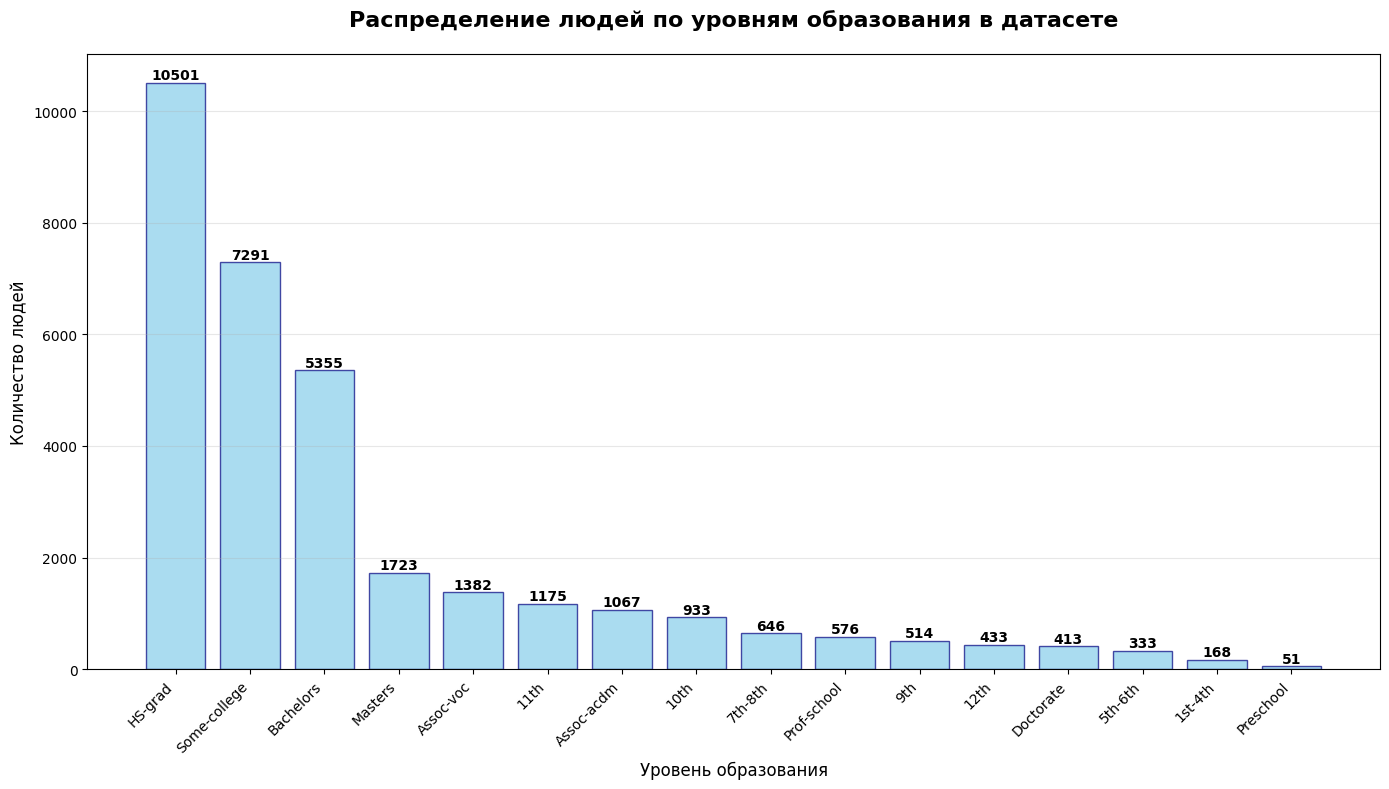

ОТВЕТ: Больше всего в датасете представлены люди с образованием 'HS-grad'
Количество: 10501 человек

Полное распределение по образованиям:
 1. HS-grad         - 10501 человек
 2. Some-college    - 7291 человек
 3. Bachelors       - 5355 человек
 4. Masters         - 1723 человек
 5. Assoc-voc       - 1382 человек
 6. 11th            - 1175 человек
 7. Assoc-acdm      - 1067 человек
 8. 10th            -  933 человек
 9. 7th-8th         -  646 человек
10. Prof-school     -  576 человек
11. 9th             -  514 человек
12. 12th            -  433 человек
13. Doctorate       -  413 человек
14. 5th-6th         -  333 человек
15. 1st-4th         -  168 человек
16. Preschool       -   51 человек


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# стили для лучшего отображения
plt.style.use('default')
sns.set_palette("husl")

# Подсчёт количества людей по уровням образования
education_counts = data['education'].value_counts()

# Создание графика
plt.figure(figsize=(14, 8))
bars = plt.bar(education_counts.index, education_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)

# Настройка внешнего вида
plt.title('Распределение людей по уровням образования в датасете', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Вывод ответа
most_common_education = education_counts.index[0]
most_common_count = education_counts.values[0]

print("=" * 60)
print(f"ОТВЕТ: Больше всего в датасете представлены люди с образованием '{most_common_education}'")
print(f"Количество: {most_common_count} человек")
print("=" * 60)
print("\nПолное распределение по образованиям:")
for i, (edu, count) in enumerate(education_counts.items(), 1):
    print(f"{i:2d}. {edu:<15} - {count:4d} человек")

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib)
P.S. Необязательное задание, хотя лучше сделать, если собираетесь сдавать до мягкого, я хоты бы посмотрю**

Анализ расапределенич возрастов:
Общее количество возрастных отрезков: 59
Отрезков с более чем 1600 значений: 4
Максимальное количество значений в одном отрезке: 1703
Минимальное количество значений в одном отрезке: 1
Среднее количество значений в отрезке: 551.9

Детальная информация по отрезкам с более чем 1600 значений:
Отрезок 5: возраст 21.9-23.2 лет - 1642 человек
Отрезок 9: возраст 26.9-28.1 лет - 1702 человек
Отрезок 13: возраст 31.8-33.1 лет - 1703 человек
Отрезок 17: возраст 36.8-38.0 лет - 1685 человек


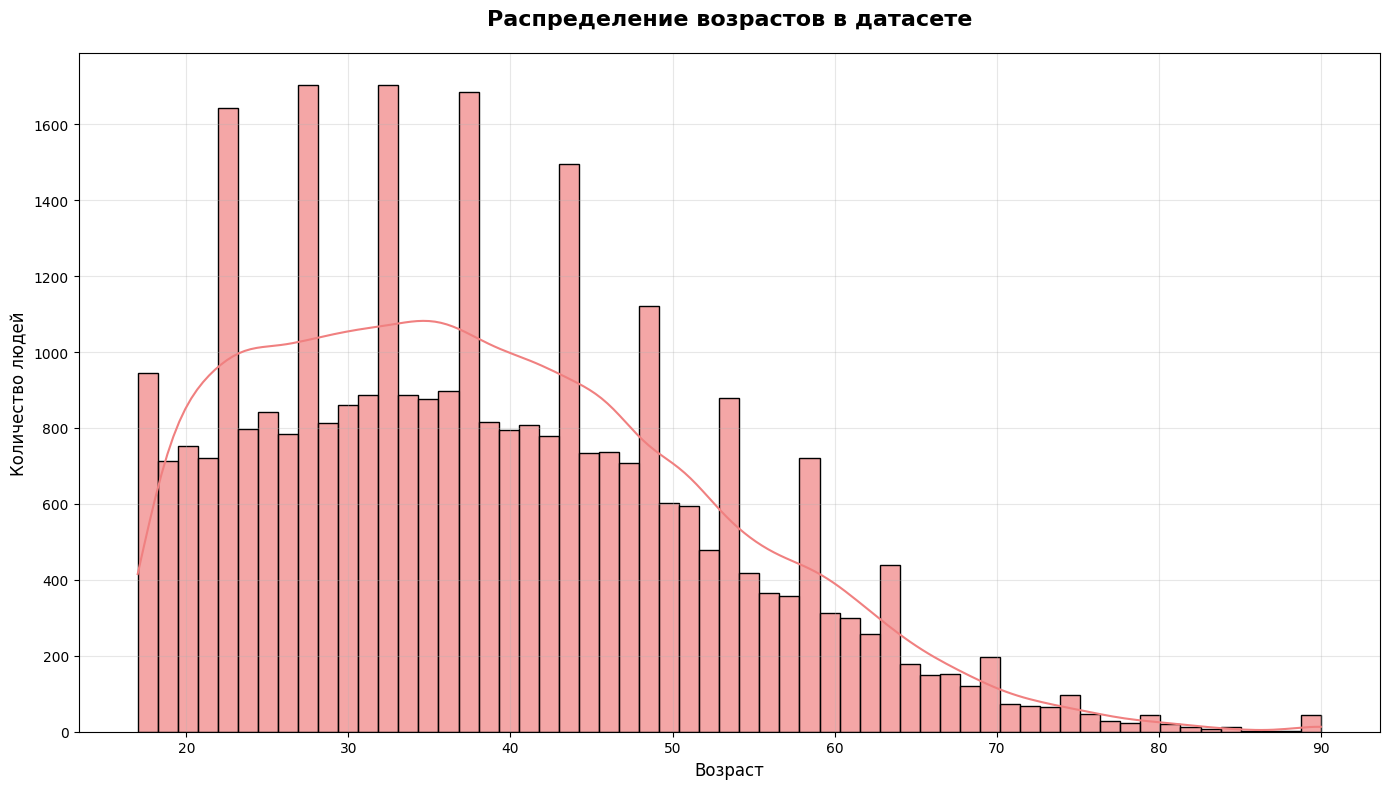

In [ ]:
plt.figure(figsize=(14, 8))

# Построение гистограммы с стандартными настройками seaborn
hist = sns.histplot(data=data, x='age', bins='auto', kde=True, color='lightcoral', alpha=0.7)

plt.title('Распределение возрастов в датасете', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.grid(alpha=0.3)

# Получение данных о столбцах гистограммы
counts, bin_edges = np.histogram(data['age'], bins='auto')

# Подсчёт отрезков с более чем 1600 значениями
segments_above_1600 = np.sum(counts > 1600)

print("=" * 70)
print("Анализ расапределенич возрастов:")
print("=" * 70)
print(f"Общее количество возрастных отрезков: {len(counts)}")
print(f"Отрезков с более чем 1600 значений: {segments_above_1600}")
print(f"Максимальное количество значений в одном отрезке: {counts.max()}")
print(f"Минимальное количество значений в одном отрезке: {counts.min()}")
print(f"Среднее количество значений в отрезке: {counts.mean():.1f}")

print("\nДетальная информация по отрезкам с более чем 1600 значений:")
for i, (count, left_edge, right_edge) in enumerate(zip(counts, bin_edges[:-1], bin_edges[1:])):
    if count > 1600:
        print(f"Отрезок {i+1}: возраст {left_edge:.1f}-{right_edge:.1f} лет - {count} человек")

plt.tight_layout()
plt.show()